# Demonstration of Gaussian Processes

In [38]:
import sys
sys.path.insert(0,'/home/fenics/Installations/MUQ_INSTALL/lib')

import pymuqModeling as mm
import pymuqApproximation as ma

import matplotlib.pyplot as plt
import numpy as np

## One Spatial Dimension

In [39]:
xDim = 1
yDim = 1

numPts = 100
x = np.zeros((1,numPts))
x[0,:] = np.linspace(0,1,numPts)

mean = ma.ZeroMean(xDim,yDim)

# How many samples to plot for each kernel
numSamps = 3

In [40]:
def PlotSamples(gp):
    plt.figure(figsize=(12,6))
    
    for i in range(numSamps):
        plt.plot(x[0,:], gp.Sample(x)[0,:])
        
    plt.xlabel('Position $x$', fontsize=16)
    plt.ylabel('Field Value $y$', fontsize=16)
    #plt.show()
    
def PlotKernel(kern):
    plt.figure(figsize=(12,6))
    
    numPlot = 100
    xs = np.linspace(0,1,numPlot).reshape(1,numPlot)
    
    base = np.array([0])
    ks = np.zeros((numPlot))
    for i in range(numPlot):
        ks[i] = kern.Evaluate(base,xs[:,i])[0,0]
        
    plt.plot(xs[0,:], ks,linewidth=3)
    plt.xlabel('Distance, $\|x-x^\prime\|$', fontsize=16)
    plt.ylabel('$k(x,x^\prime)$', fontsize=16)
    plt.ylim([0,1.1*np.max(ks)])
    #plt.show()
    
    
def PlotNonstationaryKernel(kern):
    plt.figure(figsize=(7,6))
    
    numPlot = 50
    xs = np.linspace(0,1,numPlot).reshape(1,numPlot)
    
    ks = np.zeros((numPlot,numPlot))
    for i in range(numPlot):
        for j in range(numPlot):
            ks[i,j] = kern.Evaluate(xs[:,i], xs[:,j])
            
    X,Y = np.meshgrid(xs.ravel(),xs.ravel())
    plt.contourf(X,Y,ks,40)
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$x^\prime$', fontsize=16)
    clb = plt.colorbar()
    clb.set_label('$k(x,x^\prime)$',fontsize=16)
    plt.show()

### Squared Exponential Kernel
$$
k(x,x^\prime) = \sigma^2 \exp\left[ -\frac{1}{2} \frac{\|x-x^\prime\|^2}{L^2}\right]
$$

In [41]:
var = 1.0 # Marginal Variance
length = 0.2 # Lengthscale of the kernel

kern = ma.SquaredExpKernel(xDim, var, length)

gp = ma.GaussianProcess(mean, kern)

In [42]:
PlotKernel(kern)

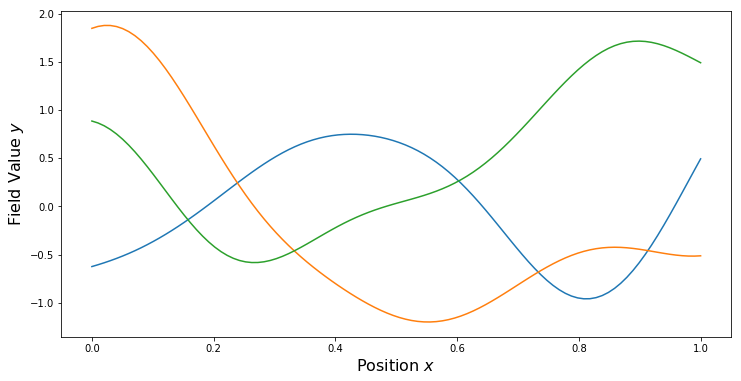

In [43]:
PlotSamples(gp)

### Matern Kernel
$$
k(x,x^\prime) = \sigma^2 \frac{2^{1-\nu}}{\Gamma(\nu)}\left(\sqrt{2\nu}\frac{\|x-x^\prime\|}{L}\right)^{\nu} K_\nu\left(\sqrt{2\nu}\frac{\|x-x^\prime\|}{L}\right)
$$

In [44]:
var = 1.0    # Marginal Variance
length = 0.2 # Lengthscale of the kernel
nu = 5.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

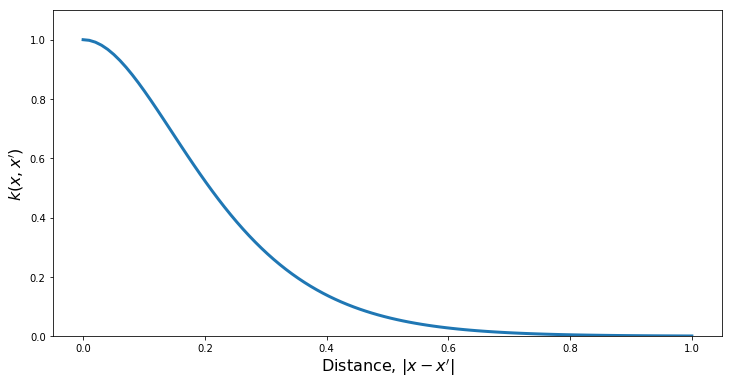

In [45]:
PlotKernel(kern)

In [46]:
PlotSamples(gp)

In [47]:
nu = 3.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

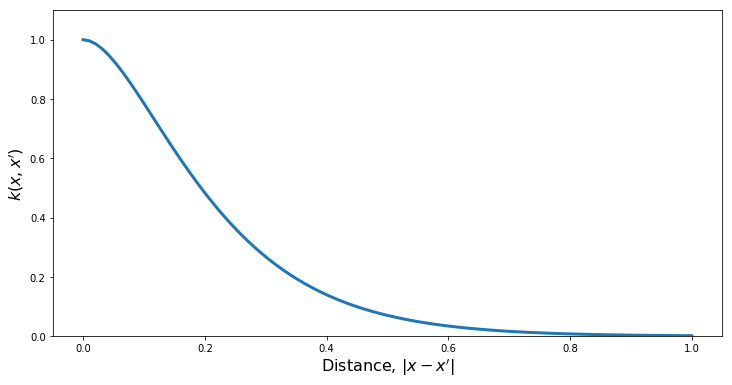

In [48]:
PlotKernel(kern)

In [49]:
PlotSamples(gp)

In [50]:
nu = 1.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

In [51]:
PlotKernel(kern)

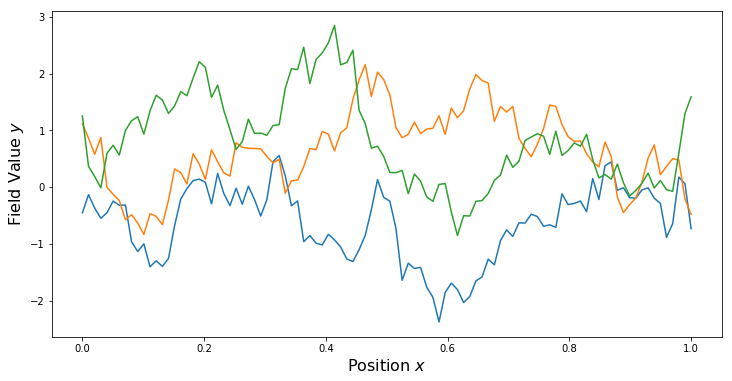

In [52]:
PlotSamples(gp)

### Periodic Kernel
$$
k(x,x^\prime) = \sigma^2 \exp\left[ -\frac{2}{L^2} \sin^2\left(\frac{\pi}{P}\|x-x^\prime\|\right) \right];
$$

In [53]:
var = 1.0    # Marginal Variance
length = 1.5 # Lengthscale of the kernel
period = 0.5 # Period

kern = ma.PeriodicKernel(xDim, var, length, period)

gp = ma.GaussianProcess(mean, kern)

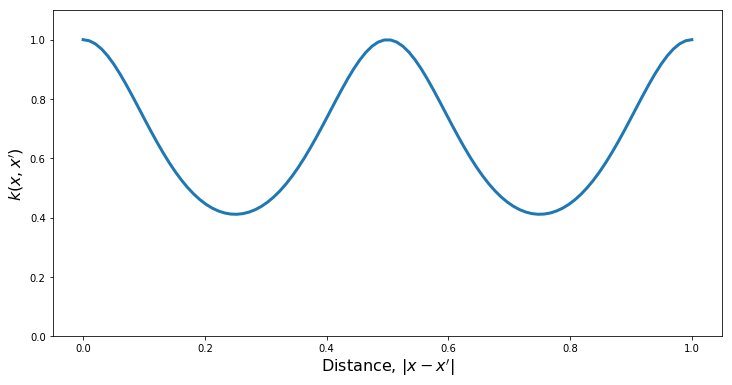

In [54]:
PlotKernel(kern)

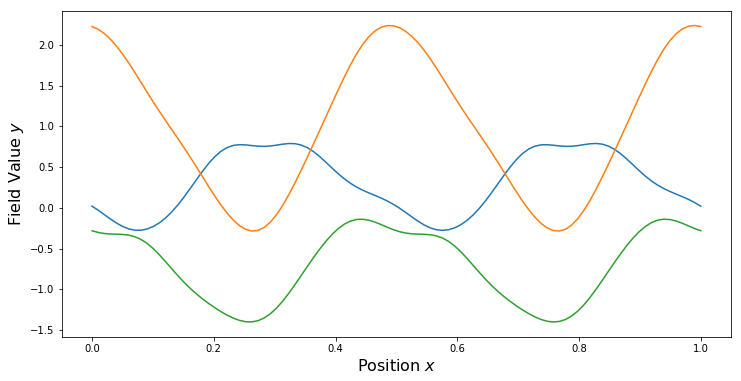

In [55]:
PlotSamples(gp)

### Constant Kernel
$$
k(x,x^\prime) = \sigma^2
$$

In [56]:
var = 1.0

kern = ma.ConstantKernel(xDim, var)

gp = ma.GaussianProcess(mean, kern)

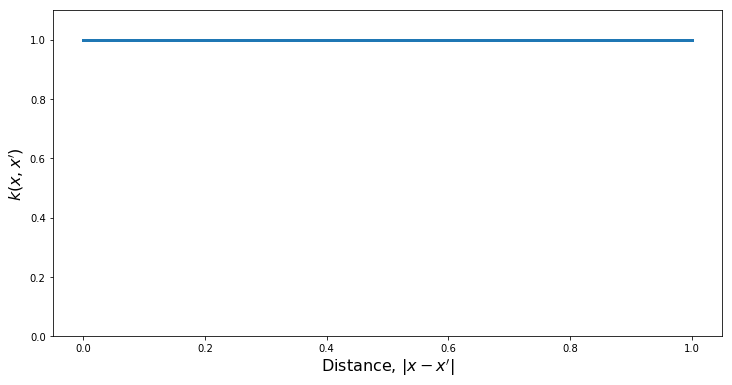

In [57]:
PlotKernel(kern)

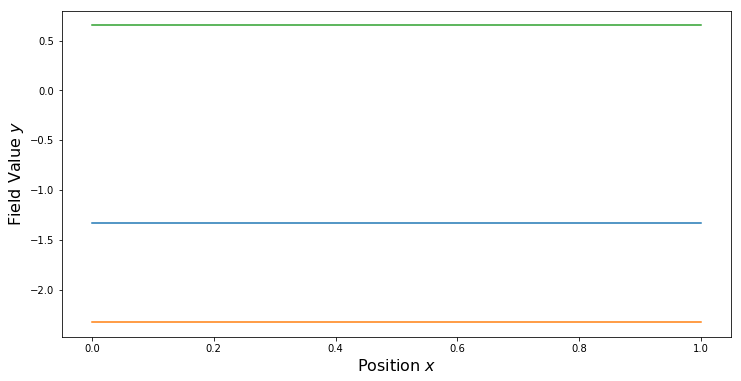

In [58]:
PlotSamples(gp)

### Quasi-Periodic Kernels
For some non-periodic kernel $k_2$ and a periodic kernel $k_{per}$, a quasi-periodic kernel can be formed through the product.
$$
k(x,x^\prime) = k_{per}(x,x^\prime) k_2(x,x^\prime)
$$

In [59]:
perVar = 1.0     # Marginal Variance
perLength = 1.5  # Lengthscale of the kernel
perPeriod = 0.25 # Period

matVar = 1.0     # Matern Variance
matLength = 0.5  # Matern Length
matNu = 3.0/2.0  # Matern Smoothness

kern1 = ma.MaternKernel(xDim, matVar, matLength, matNu)
kern2 = ma.PeriodicKernel(xDim, perVar, perLength, perPeriod)
kern = kern1*kern2

gp = ma.GaussianProcess(mean, kern)

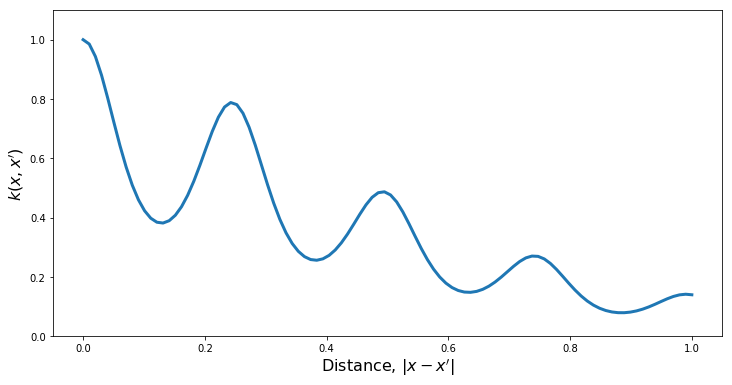

In [60]:
PlotKernel(kern)

In [61]:
PlotSamples(gp)

### Sum Kernels


In [62]:
constVar = 50.0

matVar = 1.0
matLength = 0.2
matNu = 1.0/2.0

kern1 = ma.MaternKernel(xDim, matVar, matLength, matNu)
kern2 = ma.ConstantKernel(xDim, constVar)
kern = kern1 + kern2

gp = ma.GaussianProcess(mean, kern)

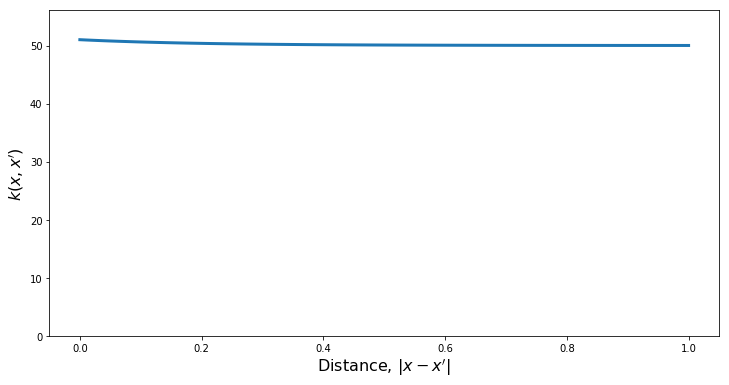

In [63]:
PlotKernel(kern)

In [64]:
PlotSamples(gp)

## Two Spatial Dimensions

In [32]:
numPts = 40
xDim = 2
yDim = 1

# Construct the grid points
x1 = np.linspace(0,1,numPts)
x2 = np.linspace(0,1,numPts)
X1, X2 = np.meshgrid(x1,x2)
x = np.zeros((2,numPts*numPts))

x[0,:] = X1.ravel()
x[1,:] = X2.ravel()

mean = ma.ZeroMean(xDim,yDim)

numSamps = 3

In [33]:
def PlotSamples2d(gp):
    gauss = gp.Discretize(x)
    fig, axs = plt.subplots(nrows=1, ncols=numSamps, figsize=(16,5))
    for i in range(numSamps):
        samp = gauss.Sample()
        axs[i].pcolor(X1, X2, np.reshape(samp, (numPts,numPts)))
        axs[i].set_title('Sample %d'%i)
        
    plt.show()

### Isotropic Matern

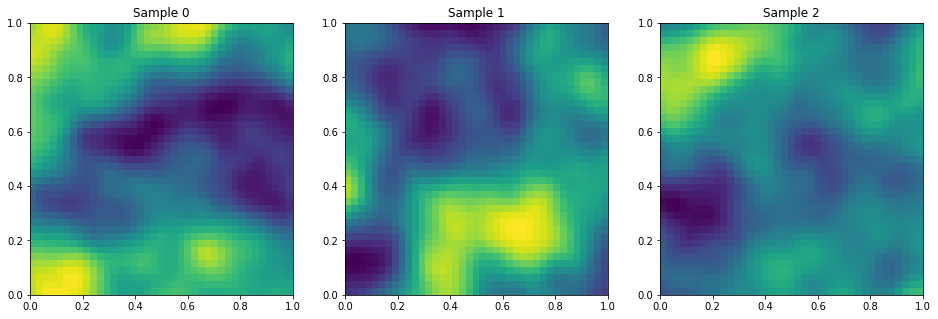

In [34]:
var = 1.0    # Marginal Variance
length = 0.2 # Lengthscale of the kernel
nu = 5.0/2.0 # Smoothness parameter

kern = ma.MaternKernel(xDim, var, length, nu)

gp = ma.GaussianProcess(mean, kern)

PlotSamples2d(gp)

### Anisotropic Matern

In [35]:
var = 1.0    # Marginal Variance
length1= 0.1 # Lengthscale of the kernel in the x_1 direction
length2= 0.4 # Lengthscale of the kernel in the x_1 direction

nu1 = 5.0/2.0 # Smoothness in x1
nu2 = 5.0/2.0 # Smoothness in x2

kern1 = ma.MaternKernel(xDim, [0], var, length1, nu1)
kern2 = ma.MaternKernel(xDim, [1], var, length2, nu2)
kern = kern1*kern2

gp = ma.GaussianProcess(mean, kern)

PlotSamples2d(gp)

### Periodic in X1, Squared Exp. in X2

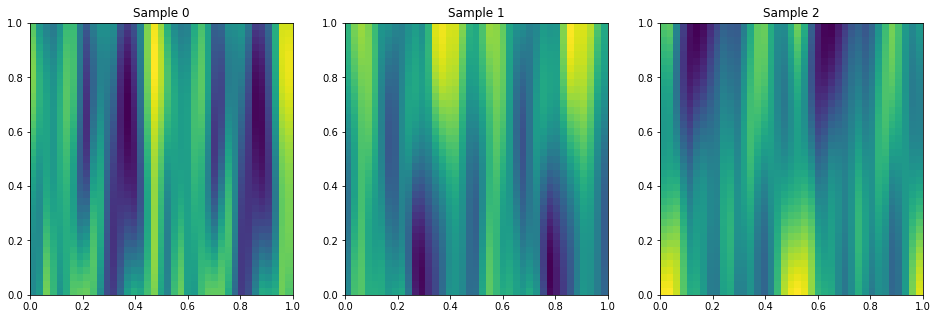

In [36]:
var = 1.0    # Marginal Variance
length1= 0.5 # Lengthscale of the kernel in the x_1 direction
length2= 0.4 # Lengthscale of the kernel in the x_1 direction
period1 = 0.5

kern1 = ma.PeriodicKernel(xDim, [0], var, length1, period1)
kern2 = ma.SquaredExpKernel(xDim, [1], var, length2)
kern = kern1*kern2

gp = ma.GaussianProcess(mean, kern)

PlotSamples2d(gp)